# MLP : Multi Layer Perceptron

[Read](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

In [110]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [111]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [112]:
len(words)

32033

In [113]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [114]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X,Y = [],[]
for w in words[:5]:

    print(w)
    context = [0] * block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context),'--->', itos[ix])
        context = context[1:] +[ix] #crop and append
    
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [115]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [116]:
# building lookup table 'C'

C = torch.randn((27,2))

In [117]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([1.4375, 0.7179])

In [118]:
C[5]

tensor([1.4375, 0.7179])

In [119]:
C[torch.tensor([5,6,7,7,7,7])]

tensor([[ 1.4375,  0.7179],
        [ 1.0368, -0.1033],
        [ 0.3934,  0.4724],
        [ 0.3934,  0.4724],
        [ 0.3934,  0.4724],
        [ 0.3934,  0.4724]])

In [120]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [121]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [122]:
emb @ W1 + b1

# this wont happen due to shape issues.

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [ ]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[-0.2606,  0.0292, -0.2606,  0.0292, -0.2606,  0.0292],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.2903, -1.7145],
        [-0.2606,  0.0292, -0.2903, -1.7145,  0.5810, -0.9122],
        [-0.2903, -1.7145,  0.5810, -0.9122,  0.5810, -0.9122],
        [ 0.5810, -0.9122,  0.5810, -0.9122, -0.2901, -0.7269],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.2606,  0.0292],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.9188, -0.2189],
        [-0.2606,  0.0292, -0.9188, -0.2189, -0.1456,  0.3794],
        [-0.9188, -0.2189, -0.1456,  0.3794,  0.2710,  0.6786],
        [-0.1456,  0.3794,  0.2710,  0.6786,  1.3930, -1.1805],
        [ 0.2710,  0.6786,  1.3930, -1.1805,  0.2710,  0.6786],
        [ 1.3930, -1.1805,  0.2710,  0.6786, -0.2901, -0.7269],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.2606,  0.0292],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.2901, -0.7269],
        [-0.2606,  0.0292, -0.2901, -0.7269,  1.3930, -1.1805],
        [-0.2901, -0.7269,  1.3930, -1.1

In [ ]:
torch.cat(torch.unbind(emb,1),1)

tensor([[-0.2606,  0.0292, -0.2606,  0.0292, -0.2606,  0.0292],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.2903, -1.7145],
        [-0.2606,  0.0292, -0.2903, -1.7145,  0.5810, -0.9122],
        [-0.2903, -1.7145,  0.5810, -0.9122,  0.5810, -0.9122],
        [ 0.5810, -0.9122,  0.5810, -0.9122, -0.2901, -0.7269],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.2606,  0.0292],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.9188, -0.2189],
        [-0.2606,  0.0292, -0.9188, -0.2189, -0.1456,  0.3794],
        [-0.9188, -0.2189, -0.1456,  0.3794,  0.2710,  0.6786],
        [-0.1456,  0.3794,  0.2710,  0.6786,  1.3930, -1.1805],
        [ 0.2710,  0.6786,  1.3930, -1.1805,  0.2710,  0.6786],
        [ 1.3930, -1.1805,  0.2710,  0.6786, -0.2901, -0.7269],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.2606,  0.0292],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.2901, -0.7269],
        [-0.2606,  0.0292, -0.2901, -0.7269,  1.3930, -1.1805],
        [-0.2901, -0.7269,  1.3930, -1.1

In [ ]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
a.shape

torch.Size([18])

In [ ]:
a.view(3,2,3)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])

In [ ]:
a.storage()

C:\Users\K\AppData\Local\Temp\ipykernel_21216\214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [ ]:
emb.view(32,6)

tensor([[-0.2606,  0.0292, -0.2606,  0.0292, -0.2606,  0.0292],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.2903, -1.7145],
        [-0.2606,  0.0292, -0.2903, -1.7145,  0.5810, -0.9122],
        [-0.2903, -1.7145,  0.5810, -0.9122,  0.5810, -0.9122],
        [ 0.5810, -0.9122,  0.5810, -0.9122, -0.2901, -0.7269],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.2606,  0.0292],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.9188, -0.2189],
        [-0.2606,  0.0292, -0.9188, -0.2189, -0.1456,  0.3794],
        [-0.9188, -0.2189, -0.1456,  0.3794,  0.2710,  0.6786],
        [-0.1456,  0.3794,  0.2710,  0.6786,  1.3930, -1.1805],
        [ 0.2710,  0.6786,  1.3930, -1.1805,  0.2710,  0.6786],
        [ 1.3930, -1.1805,  0.2710,  0.6786, -0.2901, -0.7269],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.2606,  0.0292],
        [-0.2606,  0.0292, -0.2606,  0.0292, -0.2901, -0.7269],
        [-0.2606,  0.0292, -0.2901, -0.7269,  1.3930, -1.1805],
        [-0.2901, -0.7269,  1.3930, -1.1

In [ ]:
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)

#or

# h = emb.view(-1,6) @ W1 + b1


In [ ]:
h.shape

torch.Size([32, 100])

In [ ]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [ ]:
logits = h @W2 +b2

In [ ]:
logits.shape

torch.Size([32, 27])

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts/counts.sum(1, keepdims = True)

In [ ]:
prob.shape

torch.Size([32, 27])

In [ ]:
prob[torch.arange(32), Y]

tensor([1.8739e-06, 2.2104e-03, 5.3665e-07, 1.3804e-05, 9.4241e-06, 2.5800e-08,
        4.5915e-09, 9.0445e-08, 3.3343e-06, 1.7963e-10, 4.0660e-11, 2.2486e-17,
        1.2830e-06, 1.7161e-05, 4.7891e-06, 2.0512e-05, 1.5785e-06, 3.3189e-13,
        9.0860e-03, 7.8473e-05, 7.1553e-06, 4.5595e-09, 2.8638e-11, 1.1985e-11,
        7.5232e-08, 1.6238e-07, 4.8171e-07, 1.2881e-01, 1.1972e-14, 4.1286e-07,
        2.1911e-13, 4.0615e-12])

In [ ]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(16.9305)

# Simplifying

In [ ]:
X.shape, Y.shape #dataset

(torch.Size([32, 3]), torch.Size([32]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g)
W1 = torch.randn((6,100), generator = g)
b1 = torch.randn((100), generator=g)
W2 = torch.randn((100,27), generator = g)
b2 = torch.randn((27), generator=g)
parameters = [C,W1,b1,W2,b2]

In [ ]:
sum(p.nelement() for p in parameters) #no of parameters in total

3481

In [ ]:
for p in parameters:
    p.requires_grad = True

In [ ]:
for _ in range(20):
    #forward pass
    emb = C[X] #(32,3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32,100)
    logits = h @ W2 +b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y)


    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
        #update
    for p in parameters:
        p.data += -0.1*p.grad

print(loss.item())

0.29879969358444214


In [ ]:
F.cross_entropy(logits, Y)

tensor(17.7697)

In [133]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X,Y = [],[]
for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context),'--->', itos[ix])
        context = context[1:] +[ix] #crop and append
    
X = torch.tensor(X)
Y = torch.tensor(Y)

In [227]:
X.shape, Y.shape #dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [228]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g)
W1 = torch.randn((6,100), generator = g)
b1 = torch.randn((100), generator=g)
W2 = torch.randn((100,27), generator = g)
b2 = torch.randn((27), generator=g)
parameters = [C,W1,b1,W2,b2]

In [229]:
sum(p.nelement() for p in parameters) #no of parameters in total

3481

In [230]:
for p in parameters:
    p.requires_grad = True

In [170]:
for _ in range(20):

    #minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    #forward pass
    emb = C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32,100)
    logits = h @ W2 +b2
    loss = F.cross_entropy(logits, Y[ix])
    


    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
        #update
    for p in parameters:
        p.data += -0.1 * p.grad

print(loss.item())


2.818446397781372


In [171]:
emb = C[X] #(32,3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32,100)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.9091, grad_fn=<NllLossBackward0>)

## Messing around with learning rates

In [194]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [239]:
lri = []
lossi = []

for i in range(10000):
    
    #minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32,100)
    logits = h @ W2 +b2
    loss = F.cross_entropy(logits, Y[ix])
    #print(loss.item())
    

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
        
    #update
    #lr=lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    #tracking stats
    # lri.append(lre[i])
    # lossi.append(loss.item())

print(loss.item())



2.4865212440490723


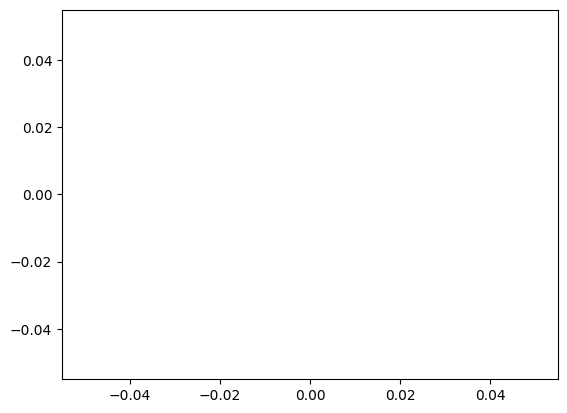

In [238]:
plt.plot(lri, lossi)

In [240]:
emb = C[X] #(32,3,2)
h = torch.tanh(emb.view(-1,6) @W1 +b1) #(32,100)
logits = h@ W2 +b2 #(32,27)
loss = F.cross_entropy(logits,Y)
loss

tensor(2.3319, grad_fn=<NllLossBackward0>)

# Split

In [241]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [242]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [243]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [244]:
for p in parameters:
  p.requires_grad = True

In [245]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [246]:
lri = []
lossi = []
stepi = []

In [247]:
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

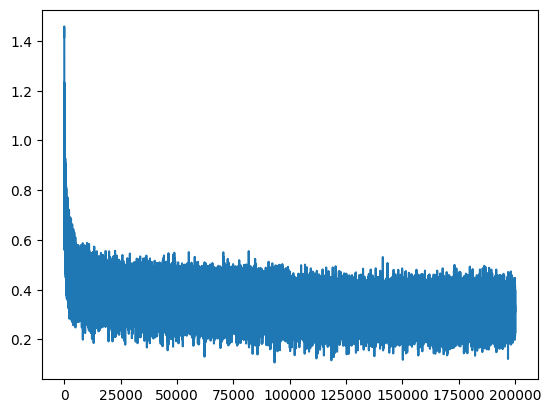

In [248]:
plt.plot(stepi, lossi)

In [249]:
# training loss 
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1118, grad_fn=<NllLossBackward0>)

In [250]:
# validation loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1553, grad_fn=<NllLossBackward0>)

In [251]:
# test loss
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.1558, grad_fn=<NllLossBackward0>)

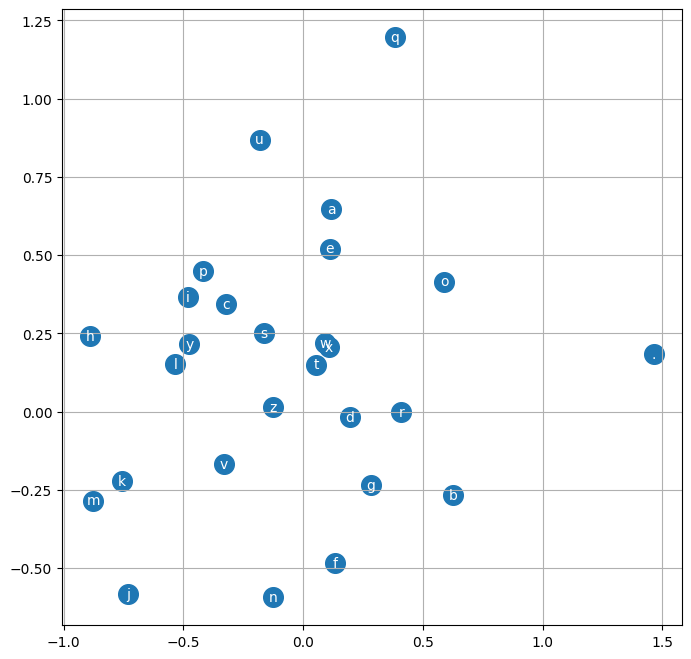

In [252]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [253]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mona.
kayanniellend.
ryla.
rethan.
endraige.
zeredielin.
shi.
jen.
edelieananareelynn.
houra.
nosalbergahimiel.
kinleenelinanthusrous.
kace.
ryyah.
faeha.
kayshia.
kyla.
halina.
yansuf.
zakhlori.
